In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
file_paths = [
    "E:/DATN_LVTN/TumorSegmentation/train/nnUNet_raw/Dataset015_lungTumor/imagesTr/lung_004_0000.nii.gz",
    "E:/DATN_LVTN/TumorSegmentation/train/nnUNet_raw/Dataset015_lungTumor/imagesTr/lung_015_0000.nii.gz",
    "E:/DATN_LVTN/TumorSegmentation/train/nnUNet_raw/Dataset015_lungTumor/imagesTr/lung_035_0000.nii.gz"
]

In [3]:
slices = []
for path in file_paths:
    img = nib.load(path).get_fdata()  # Load ảnh dưới dạng numpy array
    slice_idx = img.shape[2] // 2  # Chọn lát cắt giữa
    slices.append(img[:, :, slice_idx])  # Lưu lại lát cắt


In [6]:
def min_max_normalization(image):
    """ Min-Max Normalization: Scale về khoảng [0, 1] """
    return (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)

def z_score_normalization(image):
    """ Z-Score Normalization: Chuẩn hóa về phân phối chuẩn """
    return (image - np.mean(image)) / (np.std(image) + 1e-8)

def percentile_normalization(image, lower=0.5, upper=99.5):
    """ Percentile Normalization: Cắt ngưỡng theo percentiles và chuẩn hóa như nnUNet """
    lower_bound = np.percentile(image, lower)
    upper_bound = np.percentile(image, upper)
    image = np.clip(image, lower_bound, upper_bound)
    return (image - np.mean(image)) / (np.std(image) + 1e-8)

In [7]:
normalized_slices = {
    "Original": slices,
    "Min-Max": [min_max_normalization(s) for s in slices],
    "Z-Score": [z_score_normalization(s) for s in slices],
    "Percentile": [percentile_normalization(s) for s in slices]
}

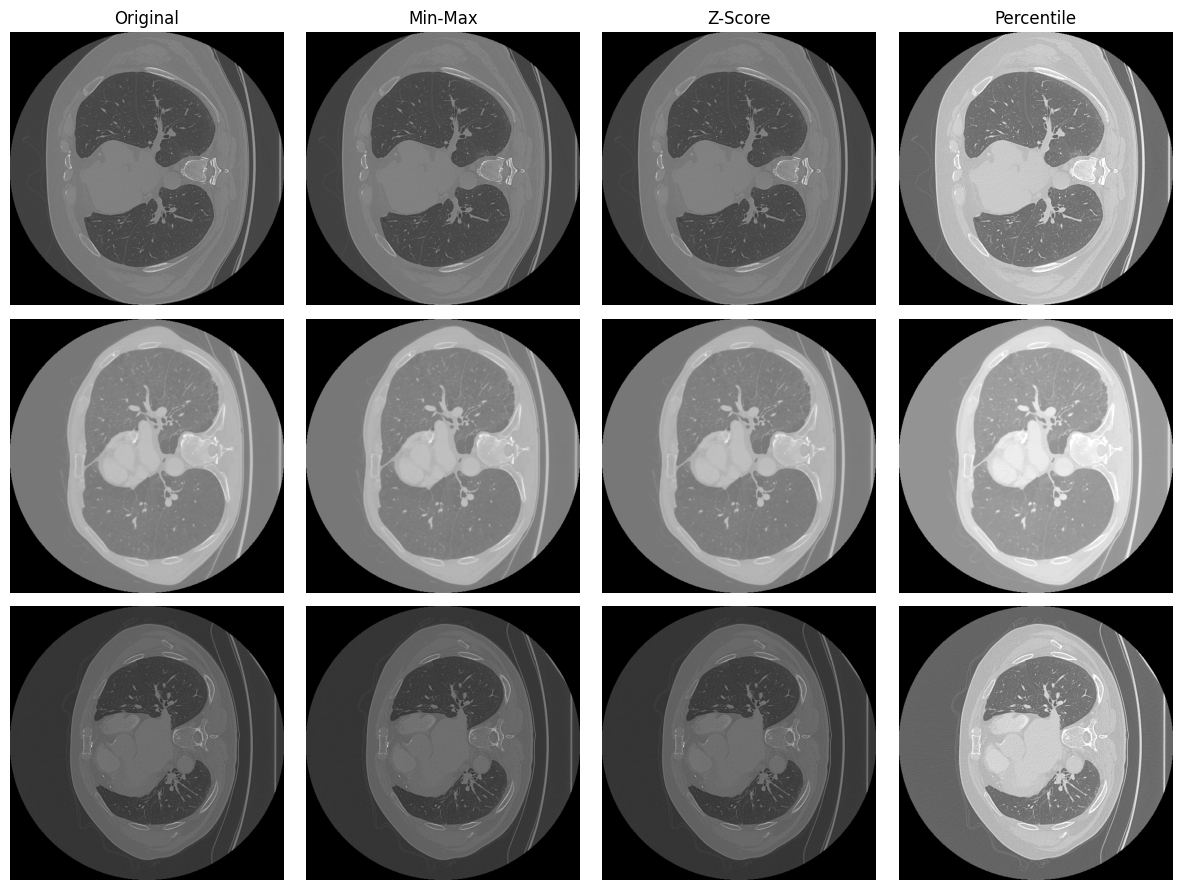

In [8]:
fig, axes = plt.subplots(len(file_paths), 4, figsize=(12, 9))

for row in range(len(file_paths)):
    for col, (method, imgs) in enumerate(normalized_slices.items()):
        axes[row, col].imshow(imgs[row], cmap='gray')
        axes[row, col].axis('off')
        if row == 0:
            axes[row, col].set_title(method)

plt.tight_layout()
plt.show()